
# Exploratory Data Analysis on Titanic Dataset

Here, I'm working working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and fun to work on! 

We'll be trying to classify whether a person might have survived or deceased in a similar scenario.

This is a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [207]:
train = pd.read_csv('titanic_train.csv')

In [208]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

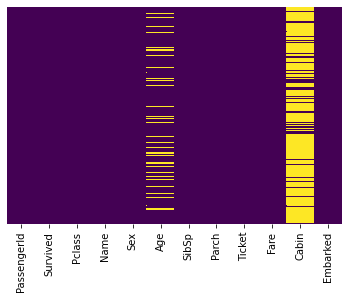

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

### Looking for trends in fields not having missing values

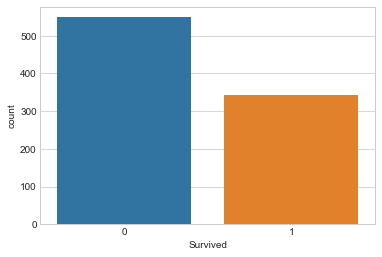

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

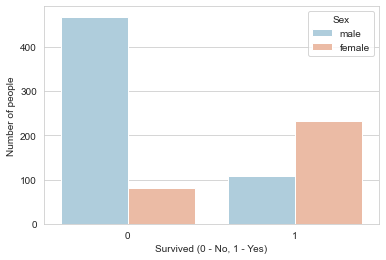

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.xlabel("Survived (0 - No, 1 - Yes)")
plt.ylabel("Number of people")

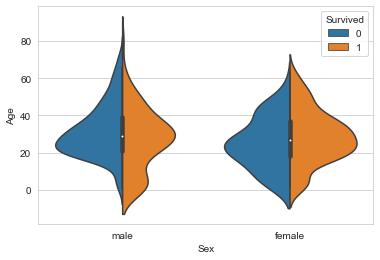

In [88]:
sns.violinplot(x='Sex',y='Age',hue='Survived', data=train,split=True)

In [68]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Many more women survived in comparison to men. Interesting!

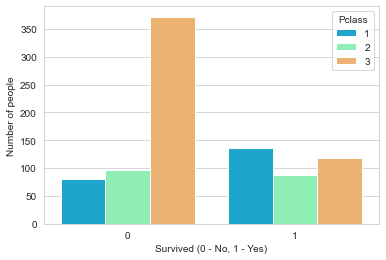

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.xlabel("Survived (0 - No, 1 - Yes)")
plt.ylabel("Number of people")

A large number of Class 3 passengers passed away whereas Class 1,2 has lesser number of casualities

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

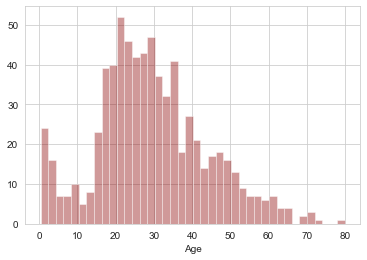

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

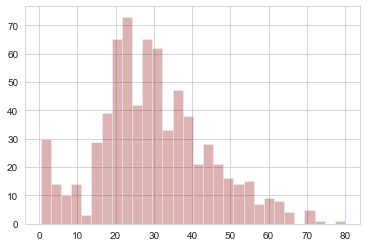

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

### Survival rate based on size of family

<AxesSubplot:xlabel='SibSp', ylabel='count'>

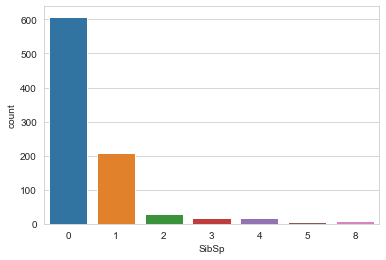

In [10]:
sns.countplot(x='SibSp',data=train)

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


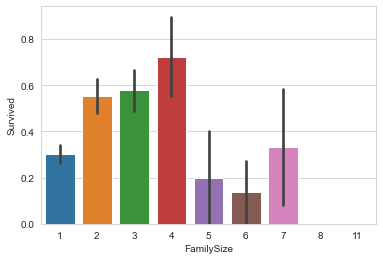

In [145]:
train['FamilySize']=train['SibSp']+train['Parch']+1
sns.barplot('FamilySize','Survived',data=train)

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


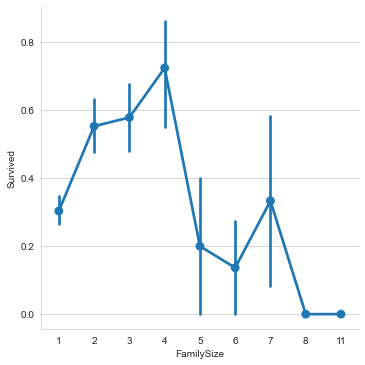

In [146]:
sns.factorplot('FamilySize','Survived',data=train)

### Survival Rates for different cabins

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64



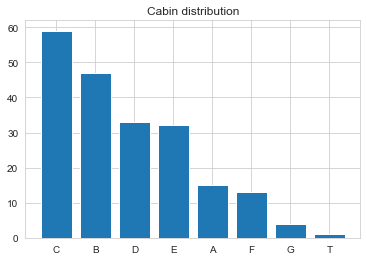

In [209]:
def take_initial(x):
    return x[0]
df=train
cabins = df['Cabin'].dropna()

cabins = cabins.apply(take_initial)

column_count = subset_df.value_counts()
cabins_count = cabins.value_counts()
print(cabins_count, end='\n\n')

plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

In [210]:
train['Deck']=train['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

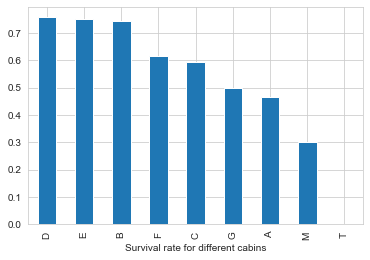

In [215]:
train[['Deck','Survived']].groupby('Deck')['Survived'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Survival rate for different cabins')

<AxesSubplot:>

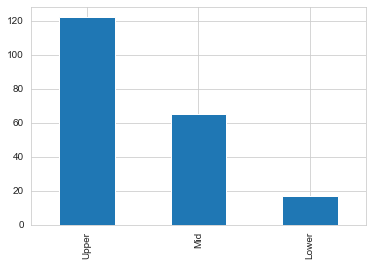

In [223]:
temp=train
idx=temp[temp['Deck']=='T'].index
temp.loc[idx,'Deck']='A'
temp['Deck']=temp['Deck'].replace(['A','B','C'],'Upper')
temp['Deck']=temp['Deck'].replace(['D','E'],'Mid')
temp['Deck']=temp['Deck'].replace(['F','G'],'Lower')
temp=temp[temp['Deck']!='M']
temp['Deck'].value_counts().plot.bar()

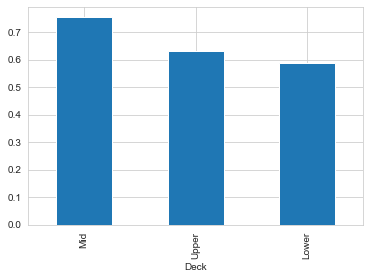

In [227]:
temp[['Deck','Survived']].groupby('Deck')['Survived'].mean().sort_values(ascending=False).plot(kind='bar')

In [228]:
temp[['Deck','Survived']].groupby('Deck')['Survived'].mean().sort_values(ascending=False)

Deck
Mid      0.753846
Upper    0.631148
Lower    0.588235
Name: Survived, dtype: float64

## Survival rate based on Port of Embarkment

<AxesSubplot:>

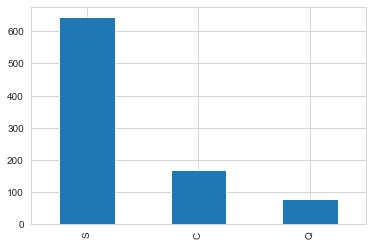

In [152]:
train['Embarked'].value_counts().plot.bar()

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


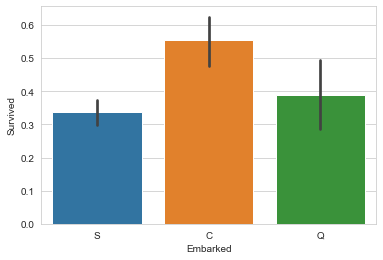

In [229]:
sns.barplot('Embarked','Survived',data=train)

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


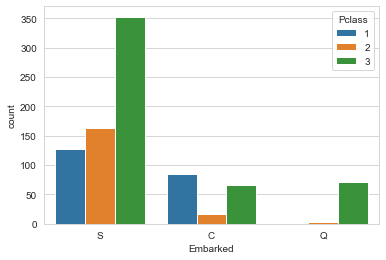

In [154]:
sns.countplot('Embarked',hue='Pclass',data=train)

Though number of people who boarded from port S (Southampton) were much higher, survial rate of those who embarked from port C (Cherbourg) was much higher.

<AxesSubplot:>

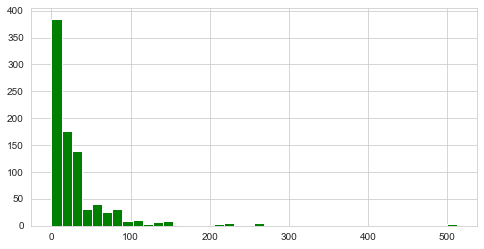

In [155]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

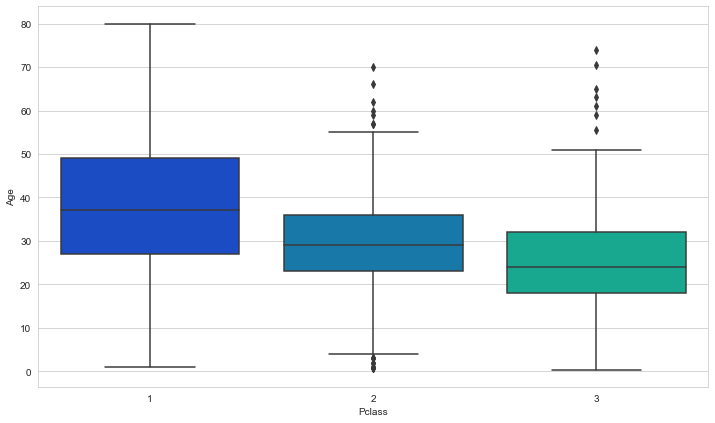

In [156]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [157]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [158]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

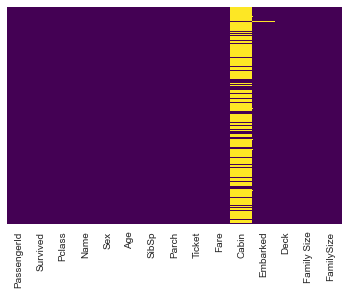

In [159]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [160]:
train.drop('Cabin',axis=1,inplace=True)

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family Size,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,1,1


In [162]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Deck         889 non-null    object 
 12  Family Size  889 non-null    int64  
 13  FamilySize   889 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 104.2+ KB


In [164]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [165]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [166]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [167]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family Size,FamilySize
0,1,0,3,22.0,1,0,7.2500,M,2,2
1,2,1,1,38.0,1,0,71.2833,C,2,2
2,3,1,3,26.0,0,0,7.9250,M,1,1
3,4,1,1,35.0,1,0,53.1000,C,2,2
4,5,0,3,35.0,0,0,8.0500,M,1,1


In [168]:
train = pd.concat([train,sex,embark],axis=1)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family Size,FamilySize,male,Q,S
0,1,0,3,22.0,1,0,7.2500,M,2,2,1,0,1
1,2,1,1,38.0,1,0,71.2833,C,2,2,0,0,0
2,3,1,3,26.0,0,0,7.9250,M,1,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C,2,2,0,0,1
4,5,0,3,35.0,0,0,8.0500,M,1,1,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [184]:
train=train.drop(['Deck','Family Size'],axis=1)

In [185]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,male,Q,S
0,1,0,3,22.0,1,0,7.2500,2,1,0,1
1,2,1,1,38.0,1,0,71.2833,2,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [186]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/garvitkat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
predictions = logmodel.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix


In [193]:

accuracy=confusion_matrix(y_test,predictions)

In [194]:
accuracy

array([[147,  16],
       [ 36,  68]])

In [195]:
from sklearn.metrics import accuracy_score

In [196]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8052434456928839

In [197]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

Let's move on to evaluate our model!

## Evaluation

We can check precision, recall, f1-score using classification report!

In [198]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



Not so bad! We can explore other feature engineering techniques and titanic_text.csv file

## Possible areas for improvement

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Cabin floor and positioning might reveal somethings
* Extract info from the ticket
